In [7]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Collect the 4-7 channel images and scale them
X, Y, info = mypackage.Dataset.load("data/tomra")
Y[Y == 3] = 2
Y[Y == 4] = 2
print(X.shape)
X = mypackage.Dataset.PCA(X, n_components=3)

print(np.unique(Y[0]), Y.shape, X.shape)
print(X.shape)
############################################
# TODO: Scale the data for the classifiers #
############################################
# Maybe use the scikit-learn StandardScaler() 
X_train, Y_train, X_test, Y_test = X[0:2], Y[0:2], X[2:3], Y[2:3]

(15, 100, 100, 208)
pca.explained_variance_ratio_
[0.96623306 0.02761681 0.00223152]
[0 1 2 5] (15, 100, 100, 1) (15, 100, 100, 3)
(15, 100, 100, 3)


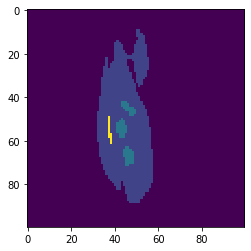

In [9]:
plt.imshow(np.squeeze(Y[0]))

# Testing UNet model

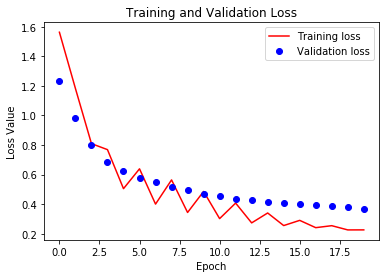

2
Predicted classes
[0 1]
Occurrences of each:
[14295  2089]


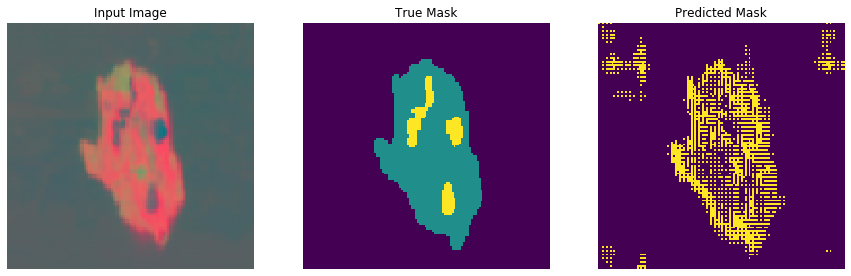

In [51]:
mypackage.standard_unet.run(X_train, Y_train, X_test, Y_test, output_chanels=3, epochs=20, steps_per_epoch=1, clear_output=True)

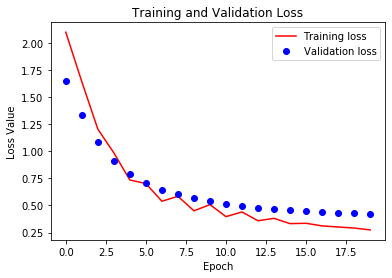

3
Predicted classes
[0 1 4]
Occurrences of each:
[14173  2204     7]


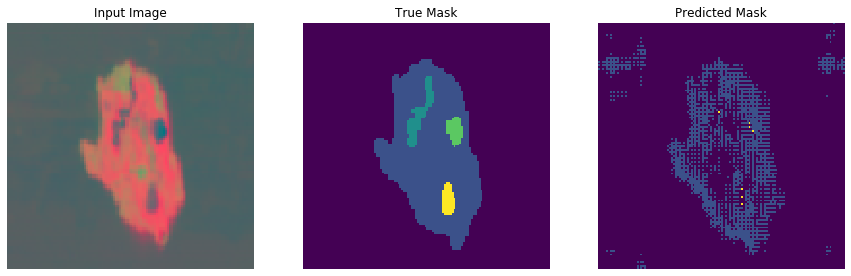

In [59]:
mypackage.standard_unet.run(X_train, Y_train, X_test, Y_test, output_chanels=3, epochs=20, steps_per_epoch=1, clear_output=True)

### This StackTransform should be part of mypackage.Dataset

In [4]:
class StackTransform():
    def __init__(self, X, Y=None):
        self.X = X
        self.Y = Y
        
    def X_stack(self):
        n_items, n, m, k = self.X.shape
        return np.resize(self.X, (n_items*n*m, k))
    
    def Y_stack(self):
        n_items, n, m, k = self.Y.shape
        return np.resize(self.Y, (n_items*n*m, k))
    
    def Unstack(self, Z):
        n_items, n, m, k = self.X.shape
        return np.resize(Z, (n_items, n, m, 1))

# Testing SVM

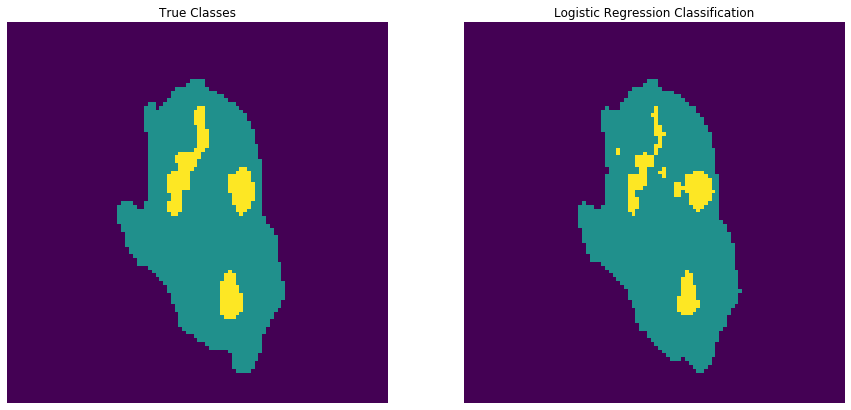

In [5]:
from sklearn import svm

train = StackTransform(X_train, Y_train)
test = StackTransform(X_test)

svc_classifier = svm.SVC(C=1, kernel='rbf', decision_function_shape='ovr')
svc_classifier.fit(train.X_stack(), train.Y_stack().ravel())
Y_hat = svc_classifier.predict(test.X_stack())
Y_hat = test.Unstack(Y_hat)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title("True Classes")
plt.imshow(np.squeeze(Y_test[0]))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Logistic Regression Classification")
plt.imshow(np.squeeze(Y_hat[0]))
plt.axis('off');

# Testing Logistic Regression

/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


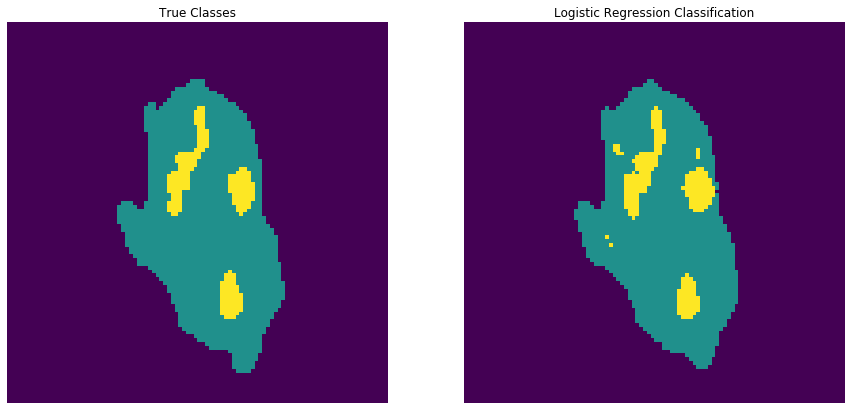

In [11]:
from sklearn.linear_model import LogisticRegression

train = StackTransform(X_train, Y_train)

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(train.X_stack(), train.Y_stack().ravel())

test = StackTransform(X_test)
Y_hat = logreg.predict(test.X_stack())
Y_hat = test.Unstack(Y_hat)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title("True Classes")
plt.imshow(np.squeeze(Y_test[0]))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Logistic Regression Classification")
plt.imshow(np.squeeze(Y_hat[0]))
plt.axis('off');

In [35]:
X_digits.shape, y_digits.shape

((1797, 64), (1797,))

Automatically created module for IPython interactive environment
Best parameter (CV score=0.985):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 30}


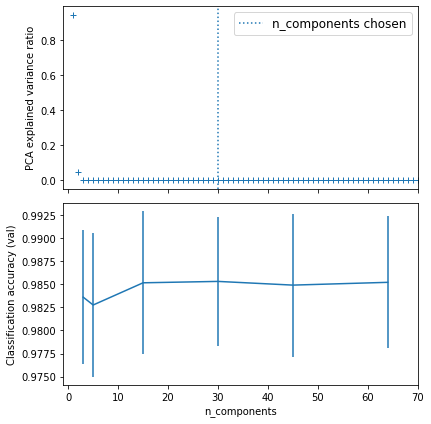

In [12]:
print(__doc__)
# Code from:
#    https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits, y_digits = train.X_stack(), train.Y_stack().ravel()

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [3,5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

# Evaluate the results
### With precision / recall or something